In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
location = '../data/govhackelectricitytimeofusedataset.txt'
df = pd.read_csv(location, sep = '\t',engine = 'python', encoding = 'utf-16')

#split data by customer_key

gb = df.groupby('CUSTOMER_KEY')    
dic = [gb.get_group(x) for x in gb.groups]


In [3]:
df.head()

,CUSTOMER_KEY,End Datetime,General Supply KWH,Off Peak KWH,Gross Generation KWH,Net Generation KWH
0,8170837,4/04/2013 11:59,0.137,0,0,0
1,8170837,4/04/2013 12:29,0.197,0,0,0
2,8170837,4/04/2013 12:59,0.296,0,0,0
3,8170837,4/04/2013 13:29,0.240,0,0,0
4,8170837,4/04/2013 13:59,0.253,0,0,0


In [4]:
def slice_data(ckey):
    return df[['End Datetime','General Supply KWH']][df.CUSTOMER_KEY == ckey]

In [5]:
df_ckey = slice_data(8170837)
df_ckey.index = df_ckey['End Datetime']

In [6]:
del df_ckey['End Datetime']
df_ckey.head()

,General Supply KWH
End Datetime,
4/04/2013 11:59,0.137
4/04/2013 12:29,0.197
4/04/2013 12:59,0.296
4/04/2013 13:29,0.240
4/04/2013 13:59,0.253


In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


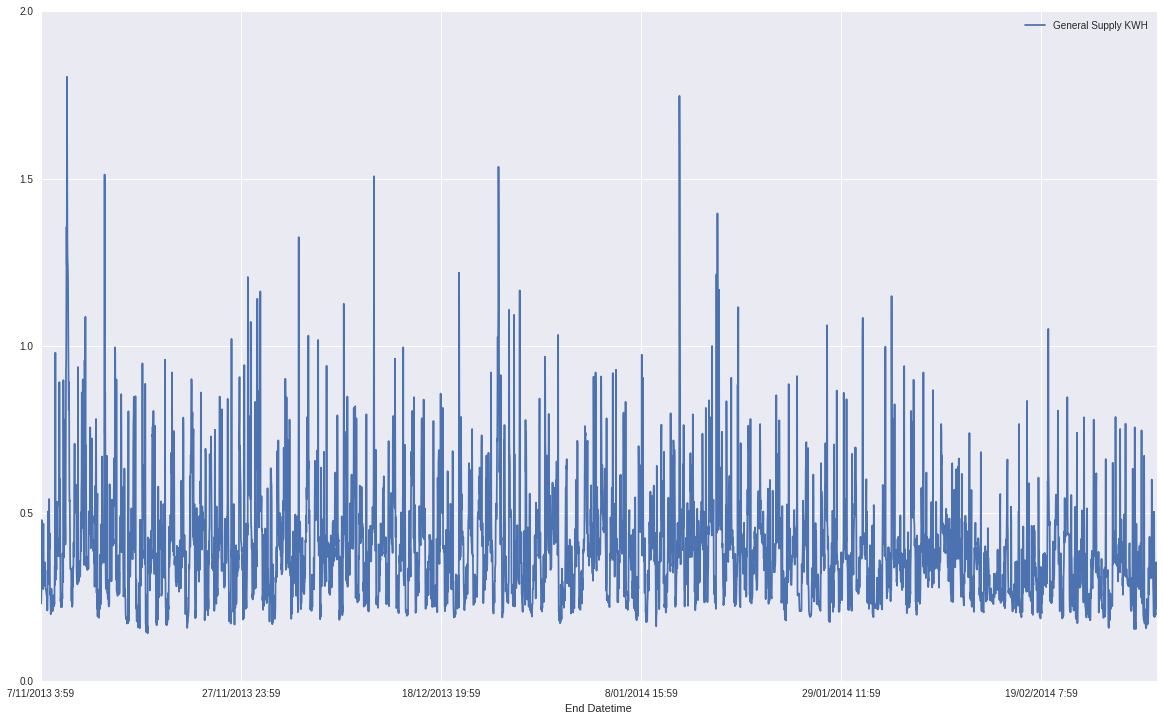

In [8]:
df_ckey[10400:].plot(figsize=(20, 12))

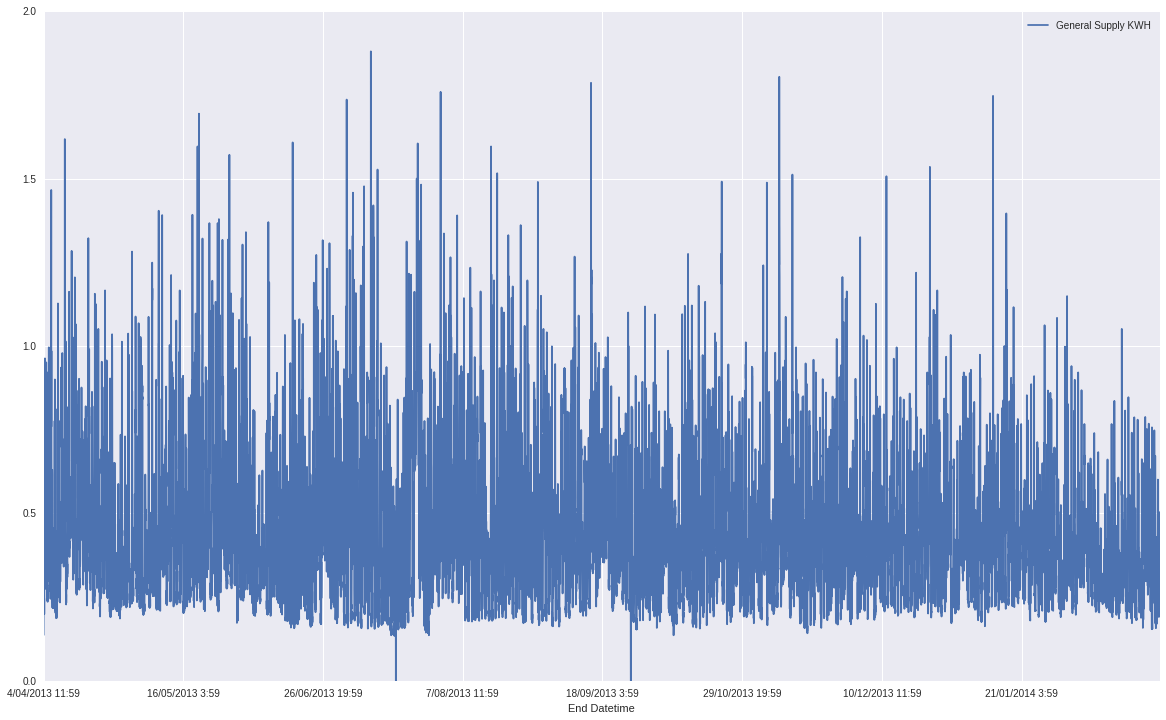

In [9]:
import matplotlib.pyplot as plt
plt.figure(); df_ckey.plot(figsize = (20,12)); plt.legend(loc='best')

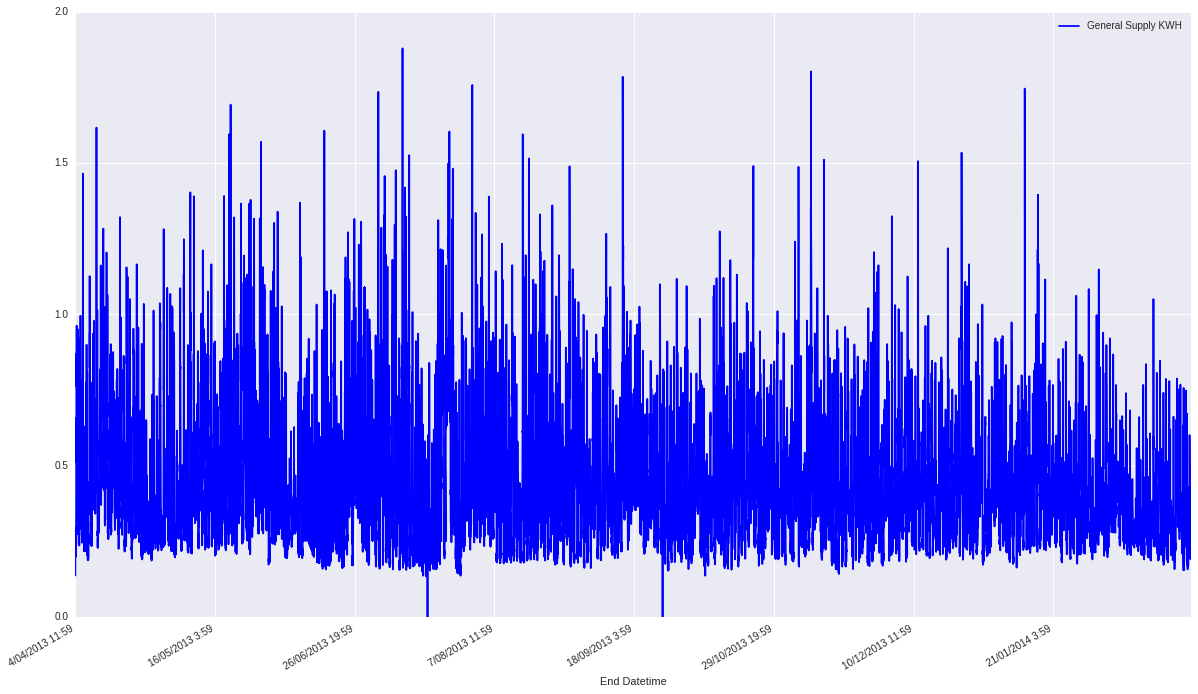

In [10]:
import matplotlib.pyplot as plt
plt.figure(); df_ckey.plot(subplots = True, figsize = (20,12)); plt.legend(loc='best')

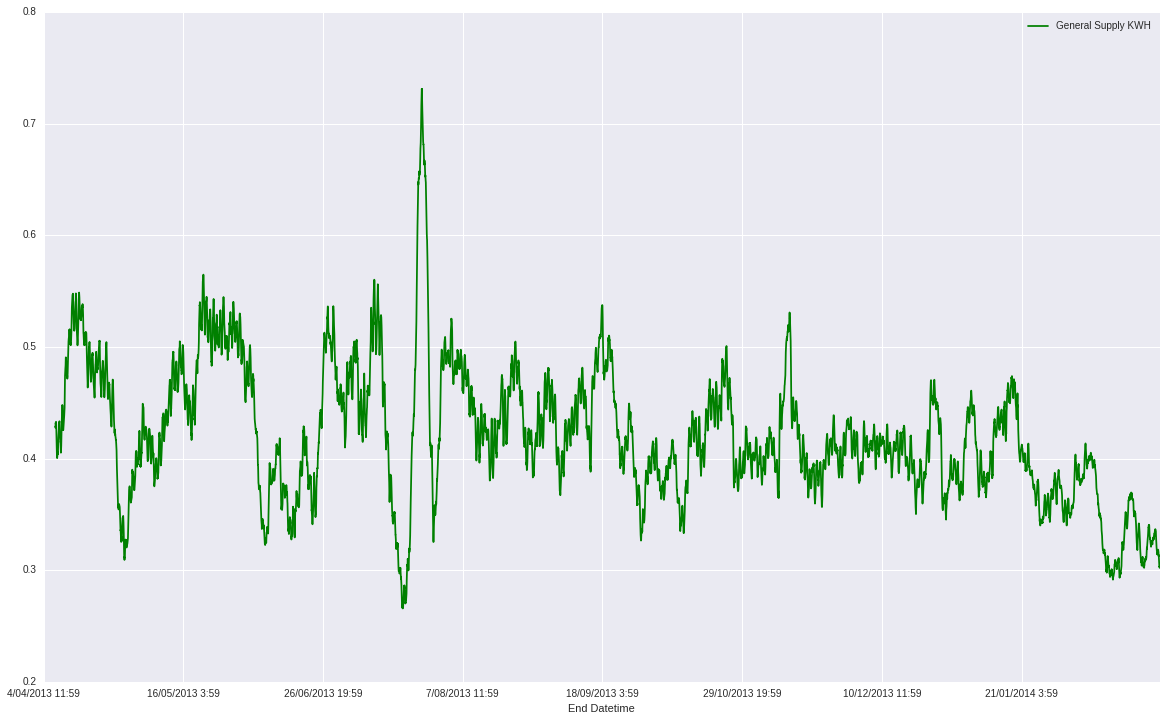

In [11]:
pd.rolling_mean(df_ckey, window=168).plot(style='-g',figsize = (20,12))

In [12]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

In [13]:
lag_correlations = acf(df_ckey['General Supply KWH'].iloc[1:])  

In [14]:
lag_correlations = pacf(df_ckey['General Supply KWH'].iloc[1:]) 

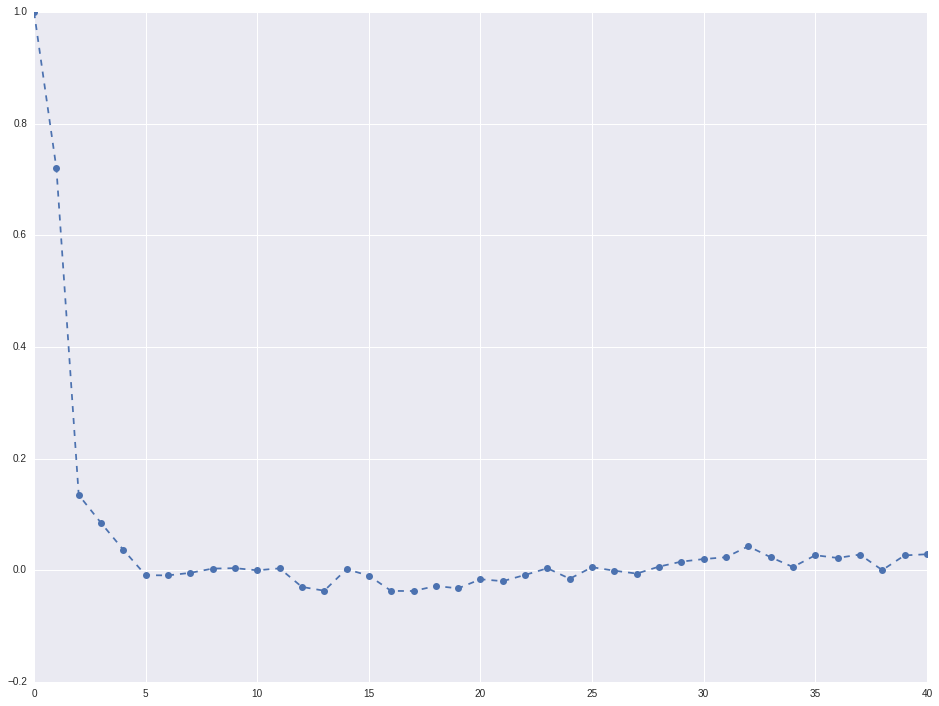

In [15]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')  

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_ckey['General Supply KWH'], model='additive', freq=24)  
fig = plt.figure()  
fig = decomposition.plot() 

AttributeError: 'Index' object has no attribute 'inferred_freq'

In [19]:
len(df_ckey)

15977

In [22]:
15977.

726.2272727272727